In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import sys

In [50]:
dataset = pd.read_csv("iris.csv").drop("Id", axis=1)
dataset 

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [51]:
cols = ['SepalLengthCm', 'SepalWidthCm']
dataset = dataset[cols]
dataset

,SepalLengthCm,SepalWidthCm
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
...,...,...
145,6.7,3.0
146,6.3,2.5
147,6.5,3.0
148,6.2,3.4


In [52]:
def euclidean_distance(df):
    n = df.shape[0]
    dist = np.zeros((n,n))
    for i in range(n):
        for j in range(n):
            dist[i,j] = np.sqrt(np.sum((df.iloc[i] - df.iloc[j])**2))
    return dist

dist_mat = euclidean_distance(dataset)
# print(dist_mat.shape)
dist_mat

array([[0.        , 0.53851648, 0.5       , ..., 1.48660687, 1.1045361 ,
        0.94339811],
       [0.53851648, 0.        , 0.28284271, ..., 1.6       , 1.36014705,
        1.        ],
       [0.5       , 0.28284271, 0.        , ..., 1.81107703, 1.5132746 ,
        1.21655251],
       ...,
       [1.48660687, 1.6       , 1.81107703, ..., 0.        , 0.5       ,
        0.6       ],
       [1.1045361 , 1.36014705, 1.5132746 , ..., 0.5       , 0.        ,
        0.5       ],
       [0.94339811, 1.        , 1.21655251, ..., 0.6       , 0.5       ,
        0.        ]])

In [53]:
def prim_mst(distances):
    num_vertices = len(distances)
    
    mst = [-1] * num_vertices
    key = [sys.maxsize] * num_vertices
    mst_set = [False] * num_vertices
    
    key[0] = 0
    
    for _ in range(num_vertices):
        min_key = sys.maxsize
        min_index = -1
        
        for v in range(num_vertices):
            if not mst_set[v] and key[v] < min_key:
                min_key = key[v]
                min_index = v
        
        mst_set[min_index] = True
        
        for v in range(num_vertices):
            if distances[min_index][v] > 0 and not mst_set[v] and distances[min_index][v] < key[v]:
                key[v] = distances[min_index][v]
                mst[v] = min_index
    
    mst_edges = np.zeros_like(distances)
    
    for i in range(1, num_vertices):
        parent = mst[i]
        weight = distances[i][parent]
        mst_edges[parent][i] = weight
    
    return mst_edges

mst_edges = prim_mst(dist_mat)
mst_edges

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

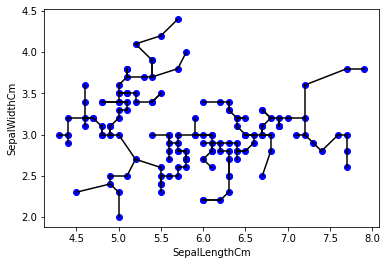

In [54]:
def plot_graph(dataset, graph, clusters=None):
    if clusters is None:
        plt.scatter(dataset.iloc[:,0], dataset.iloc[:,1], c='blue')
    else:
        for i in range(len(clusters)):
            plt.scatter(dataset.iloc[list(clusters[i]), 0], dataset.iloc[list(clusters[i]), 1])
    for i in range(graph.shape[0]):
        for j in range(graph.shape[1]):
            if graph[i,j] != 0:
                plt.plot([dataset.iloc[i,0],dataset.iloc[j,0]],[dataset.iloc[i,1],dataset.iloc[j,1]],c='black')        
    
    plt.xlabel(dataset.columns[0])
    plt.ylabel(dataset.columns[1])

plot_graph(dataset, mst_edges)
plt.show()

[{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149}, {41}, {131, 117}]


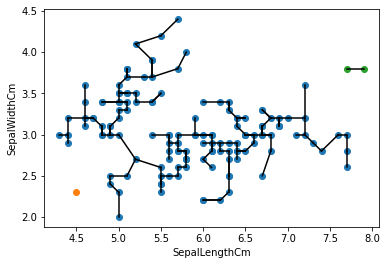

In [55]:
max_dist_indices = np.unravel_index(np.argsort(mst_edges, axis=None)[-2:], mst_edges.shape)

mst_copy = mst_edges.copy()
mst_copy[max_dist_indices] = 0

G = nx.from_numpy_matrix(mst_copy)
connected_components = list(nx.connected_components(G))
print(connected_components)

plot_graph(dataset, mst_copy, connected_components)
plt.show()